In [1]:
import csv
import numpy as np
import matplotlib.pyplot as plt # for plotting distribution graph
import math

file = open("Iris.csv")
iris = csv.reader(file)

# Column Names
header = next(iris)

# Choose only ['PetalLengthCm', 'PetalWidthCm'] as features
features = [header[3], header[4]]

test_cases = ['1', '51', '101']

# extract rows from csv file except test cases
rows = []

for row in iris:
    if row[0] not in test_cases:
        rows.append(row)
      

In [2]:
# classify flowers into their respective categories

# Iris-setosa
i_sentosa = []
i_sen_x = []
i_sen_y = []

# Iris-versicolor
i_versicolor = []
i_versi_x = []
i_versi_y = []

# Iris-virginica
i_virginica = []
i_virgi_x = []
i_virgi_y = []


for i in rows:
    feature_vectors = [i[3], i[4]]
    if (i[5] == 'Iris-setosa'):
        i_sentosa.append(feature_vectors)
        i_sen_x.append(float(i[3]))
        i_sen_y.append(float(i[4]))
        
    elif (i[5] == 'Iris-versicolor'):
        i_versicolor.append(feature_vectors)
        i_versi_x.append(float(i[3]))
        i_versi_y.append(float(i[4]))
        
    elif (i[5] == 'Iris-virginica'):
        i_virginica.append(feature_vectors)
        i_virgi_x.append(float(i[3]))
        i_virgi_y.append(float(i[4]))  
        

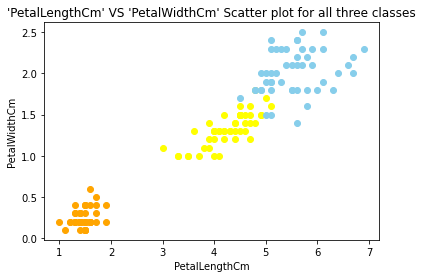

In [3]:
# 'PetalLengthCm' VS 'PetalWidthCm' Scatter plot for all three classes
plt.scatter(i_sen_x, i_sen_y, color = 'orange')
plt.scatter(i_versi_x, i_versi_y, color = 'yellow')
plt.scatter(i_virgi_x, i_virgi_y, color = 'skyblue')

plt.title("'PetalLengthCm' VS 'PetalWidthCm' Scatter plot for all three classes")
plt.xlabel('PetalLengthCm')
plt.ylabel('PetalWidthCm')

plt.show()

In [4]:
#find mean
def feature_mean(list_):
    mean = 0
    for i in list_ :
        mean = mean + i
    
    mean = mean / len(list_)
    return mean

# find the transpose of a matrix
def matrix_transpose(arr):
    transpose = [[arr[j][i] for j in range(len(arr))] for i in range(len(arr[0]))]
    return transpose

# A X B
def matrix_multiplication(A, B):
    res = [[sum(a * b for a, b in zip(A_row, B_col))
                        for B_col in zip(*B)]
                                for A_row in A]
    return res

# MAHALANOBIS DISTANCE
def mahalanobis(f1, f2, array_f1, array_f2, array):
    
    # find the means of each fature
    mean_f1 = feature_mean(array_f1)
    mean_f2 = feature_mean(array_f2)
    
    # z is the mean vector, where respective mean of each feature is subtracted from the samples
    z = array
    for i in z:
        i[0] = float(i[0]) - mean_f1
        i[1] = float(i[1]) - mean_f2

    zt = matrix_transpose(z)
    
    # Finding Inverse Covariance Matrix
    # zt X z
    cov = matrix_multiplication(zt, z)

    factor = 1 / (len(i_sen_x) - 1)
    
    cov = np.multiply(factor, cov)

    inv_cov = np.linalg.inv(cov)
    
    # calculate (x-y) and its transpose
    xt = [[f1 - mean_f1, f2 - mean_f2]]
    x = matrix_transpose(xt)


    # Inverse Covariance X (x - y)
    res1 = matrix_multiplication(inv_cov, x)

    # (xt - yt) X res
    res2 = matrix_multiplication(xt, res1)

    mdsq = res2[0][0]

    MD = math.sqrt(mdsq)
    return MD



In [5]:
# Classifier 
def classifier(fv) :
    d1 = mahalanobis(fv[0], fv[1], i_sen_x, i_sen_y, i_sentosa)
    d2 = mahalanobis(fv[0], fv[1], i_versi_x, i_versi_y, i_versicolor)
    d3 = mahalanobis(fv[0], fv[1], i_virgi_x, i_virgi_y, i_virginica)
    
    if(d1 <= d2):
        if(d1 <= d3):
            return ("Iris-Sentosa")
        else:
            return ("Iris-Virginica")
    else:
        if(d2 <= d3):
            return ("Iris-Versicolor")
        else:
            return ("Iris-Virginica")
    return 

In [6]:
# Test Cases
p1 = [1.4, 0.2]
p51 = [4.7, 1.4]
p101 = [6, 2.5]

After Classification, 
Flower 1   :  Iris-Sentosa
Flower 51  :  Iris-Versicolor
Flower 101 :  Iris-Virginica


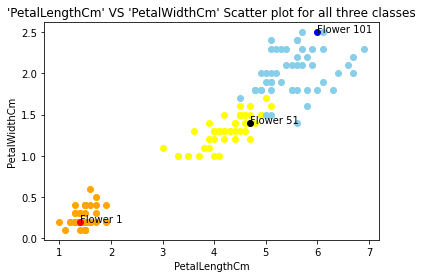

In [7]:
# Outputs
print("After Classification, ")
print("Flower 1   : ", classifier(p1))
print("Flower 51  : ", classifier(p51))
print("Flower 101 : ", classifier(p101))



# 'PetalLengthCm' VS 'PetalWidthCm' Scatter plot for all three classes
plt.scatter(i_sen_x, i_sen_y, color = 'orange')
plt.scatter(i_versi_x, i_versi_y, color = 'yellow')
plt.scatter(i_virgi_x, i_virgi_y, color = 'skyblue')

# TEST CASES
plt.scatter(p1[0], p1[1], color = 'red')
plt.annotate("Flower 1", (p1[0], p1[1]))
plt.scatter(p51[0], p51[1], color = 'black')
plt.annotate("Flower 51", (p51[0], p51[1]))
plt.scatter(p101[0], p101[1], color = 'blue')
plt.annotate("Flower 101", (p101[0], p101[1]))

plt.title("'PetalLengthCm' VS 'PetalWidthCm' Scatter plot for all three classes")
plt.xlabel('PetalLengthCm')
plt.ylabel('PetalWidthCm')

plt.show()